### 1. 형태소 분석기 변경하기

#### 1-1. 데이터 수집 및 전처리

In [8]:
import os
import pandas as pd
csv_path = os.getenv("HOME") + "/workplace/aiffel/Explore/03. news_crawler/news_data2.csv"
df = pd.read_table(csv_path, sep=',')
df.head()

,news,code
0,기사 섹션 분류 안내\n\n기사의 섹션 정보는 해당 언론사의 분류를 따르고 있습니다...,경제
1,▶제21대 총선 실시간 개표 현황 및 결과 보기\n\n총선에서 여당이 다시 한 번 ...,경제
2,[뉴욕=AP/뉴시스]지난 10일 뉴욕 증권거래소 건물에 미국 국기가 게양되어 있다....,경제
3,"부산지역 주유소에서 판매하는 기름값이 휘발유는 평균 1200원대, 경유는 1000원...",경제
4,담배업계가 소비자의 취향을 저격한 다양한 담배 신제품들을 잇달아 선보이고 있다.이전...,경제


In [9]:
# 코드 확인
idx2word = {'101' : '경제', '102' : '사회', '103' : '생활/문화', '105' : 'IT/과학'}
code_list = [101, 102, 103, 105]

In [10]:
# 샘플 확인
df.sample(10)

,news,code
2366,[사진=Sinenkiy/gettyimagesbank] [사진=Sinenkiy/get...,생활/문화
889,현대자동차가 올해 1분기(1~3월) 베트남에서 일본 도요타를 제치고 판매량 1위에 ...,경제
2377,[이데일리 오토in] 카가이 남현수 기자= “이거 사진보다 실물 디자인이 더 쥑이는...,생활/문화
1150,기사 섹션 분류 안내\n\n기사의 섹션 정보는 해당 언론사의 분류를 따르고 있습니다...,사회
3390,레고켐바이오사이언스(대표 김용주·사진)가 글로벌 기술수출에 또다시 성공했다. 201...,IT/과학
2486,출마자 공약 들여다보니\n\n\n\n구체적 공약 포함시킨 출마자 단 3명…대부분 시...,생활/문화
3216,"AI ""치료제는 2년 반, 백신은 5년 뒤에나 나온다""\n\n같은 코로나 바이러스인...",IT/과학
2744,2020년 4월 15일 수요일 (음력 3월 23일)쥐 - 재물 : 무난 건강 : 양...,생활/문화
1687,기사 섹션 분류 안내\n\n기사의 섹션 정보는 해당 언론사의 분류를 따르고 있습니다...,사회
649,조선DB. 조선DB.\n\n한국가스공사가 실시한 배전반 구매 입찰에서 담합행위를 한...,경제


In [12]:
# 정규 표현식을 이용해서 한글 외의 문자는 전부 제거합니다.
df['news'] = df['news'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
df['news'] = df['news'].str.replace("\n","")
df['news']

0       기사 섹션 분류 안내기사의 섹션 정보는 해당 언론사의 분류를 따르고 있습니다 언론사...
1       제대 총선 실시간 개표 현황 및 결과 보기총선에서 여당이 다시 한 번 승리를 거두면...
2       뉴욕뉴시스지난 일 뉴욕 증권거래소 건물에 미국 국기가 게양되어 있다 신종 코로나바이...
3       부산지역 주유소에서 판매하는 기름값이 휘발유는 평균 원대 경유는 원대에 돌입했다일 ...
4       담배업계가 소비자의 취향을 저격한 다양한 담배 신제품들을 잇달아 선보이고 있다이전까...
                              ...                        
3698    레고켐바이오사이언스대표 김용주사진가 글로벌 기술수출에 또다시 성공했다 년 중국 포순...
3699    제대 국회의원선거 기간 중단됐던 네이버 실시간 급상승 검색어 서비스가 일 오후 시부...
3700    아마존 연합뉴스 자료사진 아마존 연합뉴스 자료사진직원들 코로나 확산 방지 조치 충분...
3701    제대 국회의원선거가 임박한 가운데 투표 및 개표 방송을 준비하는 기업들의 움직임이 ...
3702    롤 점검이 일 진행될 예정이다온라인게임 리그오브레전드이하 롤은 일 오전 시부터 오전...
Name: news, Length: 3703, dtype: object

In [13]:
print(df.isnull().sum())

news    0
code    0
dtype: int64


In [14]:
## 중복 샘플 제거
df.drop_duplicates(subset=['news'], inplace=True)

print('뉴스 기사의 개수: ',len(df))

뉴스 기사의 개수:  2137


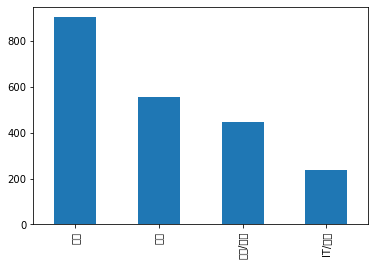

In [25]:
##3 데이터 탐색
import matplotlib
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
font_location ='/home/aiffel0047/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/__init__.py'
fprop = fm.FontProperties(fname=font_location)
df['code'].value_counts().plot(kind = 'bar')

#### 1-2. 나이브 베이즈 분류 모델 설정

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

#### 1-3. Konlpy 비교

#### 1-3-1. Mecab

In [30]:
from konlpy.tag import Mecab
tokenizer = Mecab()
# 불용어 제거
stopwords = ['에','는','은','을','했','에게','있','이','의','하','한','다','과','때문','할','수','무단','따른','및','금지','전재','경향신문','기자','는데','가','등','들','파이낸셜','저작','등','뉴스']
# 토큰화 및 토큰화 과정에서 불용어를 제거하는 함수
def preprocessing(data):
  text_data = []

  for sentence in data:
    temp_data = []
    #- 토큰화
    temp_data = tokenizer.morphs(sentence) 
    #- 불용어 제거
    temp_data = [word for word in temp_data if not word in stopwords] 
    text_data.append(temp_data)

  text_data = list(map(' '.join, text_data))

  return text_data

In [49]:
text_data = preprocessing(df['news'])
print(text_data[0])

기사 섹션 분류 안내 기사 섹션 정보 해당 언론사 분류 를 따르 고 습니다 언론사 개별 기사 를 개 이상 섹션 으로 중복 분류 ㄹ 습니다 닫기


In [38]:
# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(text_data, df['code'], random_state = 0)

# 데이터 학습
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

# 테스트
def tfidf_vectorizer(data):
  data_counts = count_vect.transform(data)
  data_tfidf = tfidf_transformer.transform(data_counts)
  return data_tfidf

# 예측
y_pred = clf.predict(tfidf_vectorizer(X_test))
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       IT/과학       0.00      0.00      0.00        59
          경제       0.63      0.98      0.77       233
          사회       0.92      0.93      0.93       132
       생활/문화       0.97      0.34      0.51       111

    accuracy                           0.73       535
   macro avg       0.63      0.56      0.55       535
weighted avg       0.70      0.73      0.67       535



/home/aiffel0047/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 1-2. Hannanum

In [39]:
from konlpy.tag import Hannanum
hannanum = Hannanum()

In [56]:
stopwords = ['에','는','은','을','했','에게','있','이','의','하','한','다','과','때문','할','수','무단','따른','및','금지','전재','경향신문','기자','는데','가','등','들','파이낸셜','저작','등','뉴스']
# 토큰화 및 토큰화 과정에서 불용어를 제거하는 함수
def preprocessing(data):
  text_data = []

  for sentence in data:
    temp_data = []
    #- 토큰화
    temp_data = hannanum.morphs(sentence) 
    #- 불용어 제거
    temp_data = [word for word in temp_data if not word in stopwords] 
    text_data.append(temp_data)

  text_data = list(map(' '.join, text_data))

  return text_data

In [57]:
text_data = preprocessing(df['news'])
# print(text_data[80])

In [58]:
# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(text_data, df['code'], random_state = 0)

# 데이터 학습
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

# 테스트
def tfidf_vectorizer(data):
  data_counts = count_vect.transform(data)
  data_tfidf = tfidf_transformer.transform(data_counts)
  return data_tfidf

# 예측
y_pred = clf.predict(tfidf_vectorizer(X_test))
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       IT/과학       0.00      0.00      0.00        59
          경제       0.61      0.98      0.75       233
          사회       0.92      0.92      0.92       132
       생활/문화       0.97      0.25      0.40       111

    accuracy                           0.71       535
   macro avg       0.62      0.54      0.52       535
weighted avg       0.69      0.71      0.64       535



/home/aiffel0047/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 1-3. Kkma

In [61]:
from konlpy.tag import Kkma
from konlpy.utils import pprint
kkma = Kkma()

In [62]:
stopwords = ['에','는','은','을','했','에게','있','이','의','하','한','다','과','때문','할','수','무단','따른','및','금지','전재','경향신문','기자','는데','가','등','들','파이낸셜','저작','등','뉴스']
# 토큰화 및 토큰화 과정에서 불용어를 제거하는 함수
def preprocessing(data):
  text_data = []

  for sentence in data:
    temp_data = []
    #- 토큰화
    temp_data = kkma.morphs(sentence) 
    #- 불용어 제거
    temp_data = [word for word in temp_data if not word in stopwords] 
    text_data.append(temp_data)

  text_data = list(map(' '.join, text_data))

  return text_data

In [63]:
text_data = preprocessing(df['news'])
print(text_data[5])

데일리 박 태진 다음 일자 데일리 신문 주요 기사 면 민주 연승 자만 말 고 협치 로 경제 살리 어야 감산 약발 안 통해 바닥 뚫리 ㄴ 유 또 달러 아래 로 투표율 년 만 최고 국민 목 소리 커지 었 총선 투표율 분석 코로나 도 못 막 민심 투표율 뛰 어 민주당 환호 통합 당 침묵 황 교 안 끝 까지 지켜보 아야 사설 이번 총 서 승리자 유권자 총선 승패 갈리 ㄴ 순간 코로나 대응 호평 승기 잡 아 막말 스스로 무너지 ㄴ 도 한몫 비대 위 출범 불가 피 당권 두고 계파 갈등 재현 가능성 민생 당 지역 기반 잃 어 정의 당 캐스팅 보트 역할 약화 ㄹ 듯 총선 희비 엇갈리 ㄴ 잠룡 낙 연 차기 대선 직행 유력 황 교 안 패배 책임론 불가 피년 만 잦아들 ㄴ 국민 당 침통 대통령 국정 운영 탄력 민생 경제 회복 가속도 총선 지역별 판세 양당 대결 영 호남 지역 구도 더 뚜렷 해지 어 수도권 여당 손들 어 주 어 민주 년 만 싹쓸이 민생 당 전멸 통합 보수 텃밭 스 어 자존심 지키 어 중원 싸움 팽팽 근소 ㄴ 차로 우세 총선 화제 인물 금융 전문가 홍성 국 윤 창현 중기 김 경 만 최승 재 경제 관료 유경 주 ㄴ 체면 구기 ㄴ 해결사 은퇴 냐 비대 위원장 냐 선 천정 배 꺾 양 향자 탈북자 첫 의원 태 구민 총선 경제 전문가 제언 금융 위기 때 보다 상황 심각 골든 타임 지나 기 전 경제 회복 걷 어라 재계 서비스 산업 발전 법 규제 완화 입법 서두르 어야 한목소리 총선 ㄴ 눈 보 총선 지도 거대 양당 갈라지 ㄴ 틈 맥 못 추 ㄴ 군소 정 당국 제 트럼프 코로나 패 ㄴ 데 믹 초래 지원 중단 유엔 책임 전가 비난 코로나 직격탄 항공사 곳 조원 푸 ㄴ다 원격 근무 시장 코로나 이후 배 로 커지 ㄹ 것 경제 돈 풀기 급하 ㄴ데 운신 폭 좁 이주 열 코로나 법 개정 힘 받 나 철도 예산 따오 았 덜 니 알 고 보 니 확정 되 ㄴ 정부 사업 금융 대신 나선 카드 게 뱅 최대 주주 오르 ㄴ다 메리 츠 화재 인상 끝 으로 보험료 수술 사실상 마무리 년 전 야마 토 생명 회자 되

In [64]:
# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(text_data, df['code'], random_state = 0)

# 데이터 학습
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

# 테스트
def tfidf_vectorizer(data):
  data_counts = count_vect.transform(data)
  data_tfidf = tfidf_transformer.transform(data_counts)
  return data_tfidf

# 예측
y_pred = clf.predict(tfidf_vectorizer(X_test))
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       IT/과학       0.00      0.00      0.00        59
          경제       0.63      0.98      0.77       233
          사회       0.92      0.93      0.92       132
       생활/문화       0.97      0.35      0.52       111

    accuracy                           0.73       535
   macro avg       0.63      0.57      0.55       535
weighted avg       0.70      0.73      0.67       535



/home/aiffel0047/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 1-4. Komoran

In [ ]:
from konlpy.tag import Komoran
komoran = Komoran(userdic='/tmp/dic.txt')

In [ ]:
stopwords = ['에','는','은','을','했','에게','있','이','의','하','한','다','과','때문','할','수','무단','따른','및','금지','전재','경향신문','기자','는데','가','등','들','파이낸셜','저작','등','뉴스']
# 토큰화 및 토큰화 과정에서 불용어를 제거하는 함수
def preprocessing(data):
  text_data = []

  for sentence in data:
    temp_data = []
    #- 토큰화
    temp_data = kkma.morphs(sentence) 
    #- 불용어 제거
    temp_data = [word for word in temp_data if not word in stopwords] 
    text_data.append(temp_data)

  text_data = list(map(' '.join, text_data))

  return text_data

In [ ]:
text_data = preprocessing(df['news'])
print(text_data[55])

In [ ]:
# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(text_data, df['code'], random_state = 0)

# 데이터 학습
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

# 테스트
def tfidf_vectorizer(data):
  data_counts = count_vect.transform(data)
  data_tfidf = tfidf_transformer.transform(data_counts)
  return data_tfidf

# 예측
y_pred = clf.predict(tfidf_vectorizer(X_test))
print(metrics.classification_report(y_test, y_pred))

#### 1-5. Okt

In [ ]:
from konlpy.tag import Okt
okt = Okt()

In [ ]:
stopwords = ['에','는','은','을','했','에게','있','이','의','하','한','다','과','때문','할','수','무단','따른','및','금지','전재','경향신문','기자','는데','가','등','들','파이낸셜','저작','등','뉴스']
# 토큰화 및 토큰화 과정에서 불용어를 제거하는 함수
def preprocessing(data):
  text_data = []

  for sentence in data:
    temp_data = []
    #- 토큰화
    temp_data = kkma.morphs(sentence) 
    #- 불용어 제거
    temp_data = [word for word in temp_data if not word in stopwords] 
    text_data.append(temp_data)

  text_data = list(map(' '.join, text_data))

  return text_data

In [ ]:
text_data = preprocessing(df['news'])
print(text_data[100])

In [ ]:
# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(text_data, df['code'], random_state = 0)

# 데이터 학습
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

# 테스트
def tfidf_vectorizer(data):
  data_counts = count_vect.transform(data)
  data_tfidf = tfidf_transformer.transform(data_counts)
  return data_tfidf

# 예측
y_pred = clf.predict(tfidf_vectorizer(X_test))
print(metrics.classification_report(y_test, y_pred))

#### 1-6. 나이브 베이즈 분류모델

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [36]:
# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(text_data, df['code'], random_state = 0)

# 데이터 학습
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

# 테스트
def tfidf_vectorizer(data):
  data_counts = count_vect.transform(data)
  data_tfidf = tfidf_transformer.transform(data_counts)
  return data_tfidf

# 예측
y_pred = clf.predict(tfidf_vectorizer(X_test))
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       IT/과학       0.00      0.00      0.00        59
          경제       0.63      0.98      0.77       233
          사회       0.92      0.93      0.93       132
       생활/문화       0.97      0.34      0.51       111

    accuracy                           0.73       535
   macro avg       0.63      0.56      0.55       535
weighted avg       0.70      0.73      0.67       535



/home/aiffel0047/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 1-4. KoNLPy 장단점 및 처리속도, 성능 비교

- 처리 속도 비교 Mecab < Komoran < Okt < Hannanum <<< Kkma
- Hannanum: 형태소 후보를 모두 반환
- Kkma: 품사 분석 정확도 높으나, 분석 시간이 너무 오래 걸림
- Komoran: 빈 줄이 있으면 에러 발생,
- Okt: 텍스트를 구문별로 나누어줌
    
- Mecab으로 분석하는 것이 가장 효율적이다.


In [ ]:
# 참고: 각 형태소 분석기가 분석하는데 걸리는 시간 체크 코드 
# (출처: https://anpigon.github.io/blog/busy/@anpigon/5s1aam/)

'''
import time
from konlpy.tag import Kkma, Okt, Komoran, Hannanum, Mecab
from steem import Steem 
from steem.blog import Blog

username = 'anpigon'
b = Blog(username)
posts = b.all()
# posts = b.take(10)

texts = []
for post in posts:
  if post.body != "":
    texts.append(post.body.replace('\n', ''))

pos_taggers = [('Kkma', Kkma()), ('Okt', Okt()), ('Komoran', Komoran()), ('Hannanum', Hannanum()), ('Mecab', Mecab())]
for name, tagger in pos_taggers:
  process_time = time.time()
  for text in texts:
    tagger.pos(text)
  process_time = time.time() - process_time
  print('module = %10s, %.3f secs' % (name, process_time))
'''

### 2. 불용어 추가하기

#### 2-1. 불용어 리스트

In [83]:
stopwords = ['로이터', '뉴스보야쥬', '넷따잡', '뷰잉', '영상보기', '채널', '출처', '뉴시스', '및', '연합뉴스', '지디넷코리아', '노컷뉴스', '한국일보', '해럴드경제', '아이뉴스', '로고뉴스', '사진제공', '전자신문', '무단전재', '에','는','은','을', '로', '되','를','당','채널','됐','경우','게','으로','했','에게', '에서', '있','적', '인', '께','고','이','의','하','한','다','과','때문','할','수','무단','따른','및','금지','전재','경향신문','기자','는데','가','등','들','파이낸셜','저작','등','뉴스','라고', '아이뉴스','뉴스레터', '전자신문인터넷','안내기사의', '앵커', '이데일리', '입니다', '중복', '무단전재', '재배포', '닫기', '도', '섹션'] 

#### 2-2. 불용어 추가 전후 모델 성능 비교
- f1 정확도가 소폭 상승하나 큰 차이는 보이지 않는다.

#### 2-3. 지나치게 빈도 낮은 단어, 높은 단어 성능 비교

- 신문기사 명, 각 페이지마다 붙는 기본 단어 삭제 시 정확도 소폭 상승

### 3. 다른 날짜 데이터 추가

#### 3-1. csv 파일 병합

In [84]:
import glob
input_file = r"/home/aiffel0047/workplace/aiffel/Explore/03. news_crawler/news_dataset"
output_file = r"/home/aiffel0047/workplace/aiffel/Explore/03. news_crawler/news_dataset/total_data.csv"

allFile_list = glob.glob(os.path.join(input_file, 'news_*')) # glob함수로 news_로 시작하는 파일들을 모은다
allData = []
for file in allFile_list:
    df = pd.read_csv(file) # for구문으로 csv파일들을 읽어 들인다
    allData.append(df) # 빈 리스트에 읽어 들인 내용을 추가한다

dataCombine = pd.concat(allData, axis=0, ignore_index=True) 
dataCombine.to_csv(output_file, index=False)

#### 3-2. Mecab 테스트

In [85]:
csv_path = os.getenv("HOME") + "/workplace/aiffel/Explore/03. news_crawler/news_dataset/total_data.csv"
df = pd.read_table(csv_path, sep=',')

df['news'] = df['news'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
df['news'] = df['news'].str.replace("\n","")

df.drop_duplicates(subset=['news'], inplace=True)

def preprocessing(data):
  text_data = []

  for sentence in data:
    temp_data = []
    temp_data = tokenizer.morphs(sentence) 
    temp_data = [word for word in temp_data if not word in stopwords] 
    text_data.append(temp_data)

  text_data = list(map(' '.join, text_data))

  return text_data

text_data = preprocessing(df['news'])

X_train, X_test, y_train, y_test = train_test_split(text_data, df['code'], random_state = 0)

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

def tfidf_vectorizer(data):
  data_counts = count_vect.transform(data)
  data_tfidf = tfidf_transformer.transform(data_counts)
  return data_tfidf

y_pred = clf.predict(tfidf_vectorizer(X_test))
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       IT/과학       0.82      0.69      0.75       343
          경제       0.88      0.50      0.64       261
          사회       0.70      0.89      0.78       611
       생활/문화       0.77      0.77      0.77       534

    accuracy                           0.76      1749
   macro avg       0.79      0.71      0.74      1749
weighted avg       0.77      0.76      0.75      1749



### 평가

4월부터 8월까지 다양한 데이터를 크롤링하여 모델을 만들었으나 정확도가 처음보다 떨어지는 결과가 나왔습니다. csv 파일을 열어 대략적인 자연어 처리가 어떤 과정을 통해 이루어지는 간단하게 이해할 수 있는 과정이었습니다. 그러나 어떻게 하면 정확도를 높일 수 있는지에 대한 약간의 힌트나 가이드가 있으면 단순 작업하는 시간을 줄이고 모델을 이해하는 데에 시간을 더 쓸 수 있을 것으로 보입니다.